In [42]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [2]:
import pandas as pd

# Correcting the typo in the function name and specifying the correct path
data = pd.read_csv("../data/Copy of BrentOilPrices.csv")  # Use the correct function name
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the DataFrame
print(data.head())


C:\Users\Naim\AppData\Local\Temp\ipykernel_21376\775095739.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [3]:
print(data.isnull().sum())

Date     0
Price    0
dtype: int64


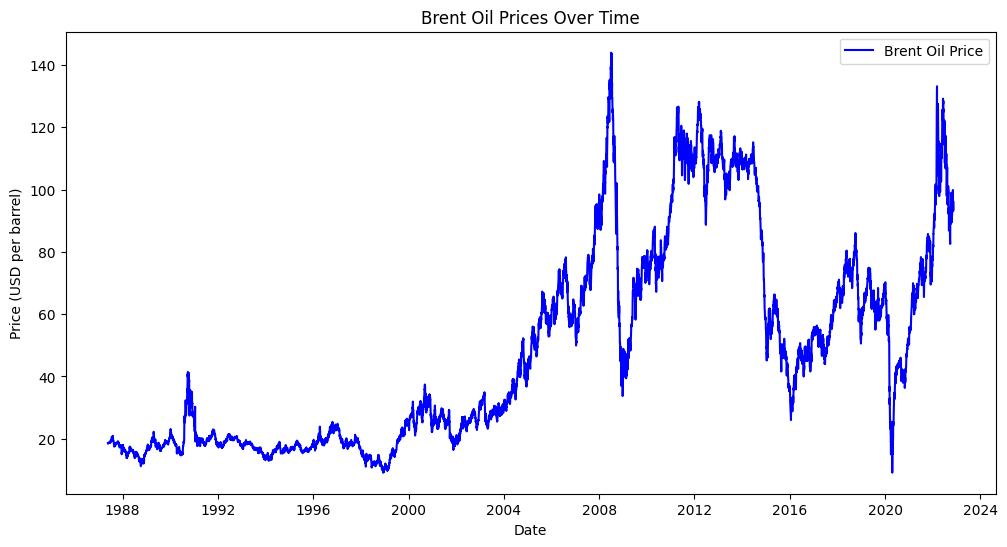

In [4]:
import matplotlib.pyplot as plt

# Plotting the Brent oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()


In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


# differencing to make it stationary

In [6]:
# Differencing the series
data['Price_diff'] = data['Price'].diff().dropna()

# Re-run the ADF test on the differenced data
result_diff = adfuller(data['Price_diff'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])


ADF Statistic after differencing: -15.52936758004806
p-value after differencing: 2.2307405105160745e-28


<Figure size 1200x600 with 0 Axes>

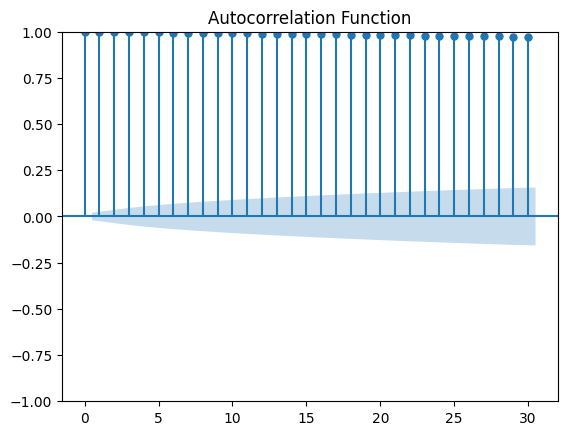

<Figure size 1200x600 with 0 Axes>

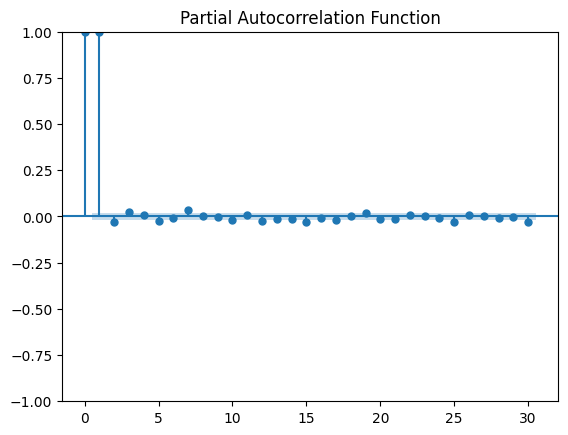

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data['Price'], lags=30)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Price'], lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()


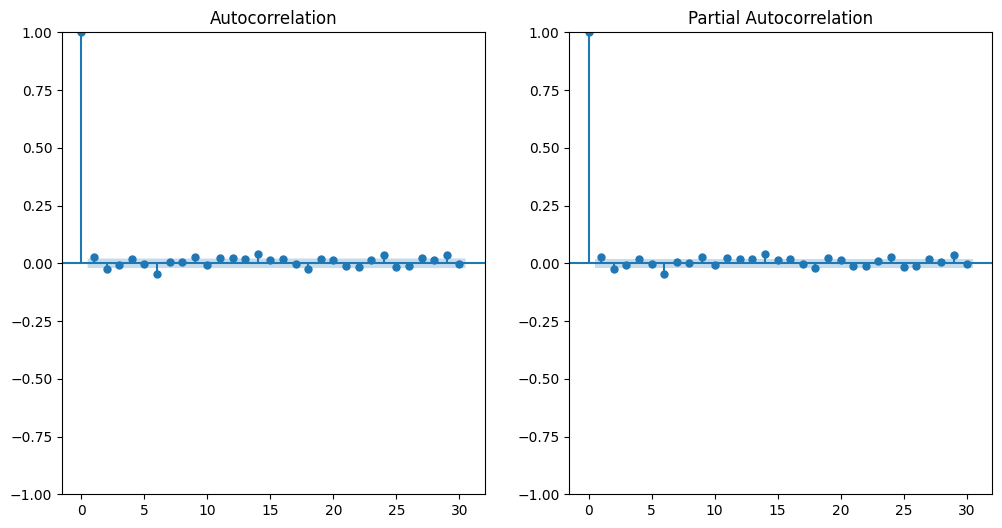

c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Mon, 04 Nov 2024   AIC                          29093.899
Time:                        15:28:31   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(data['Price_diff'].dropna(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(data['Price_diff'].dropna(), lags=30, ax=ax[1])
plt.show()

# Fit the ARIMA model
p = 1  # Set based on ACF/PACF
d = 1  # We differenced once
q = 1  # Set based on ACF/PACF

model = ARIMA(data['Price'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


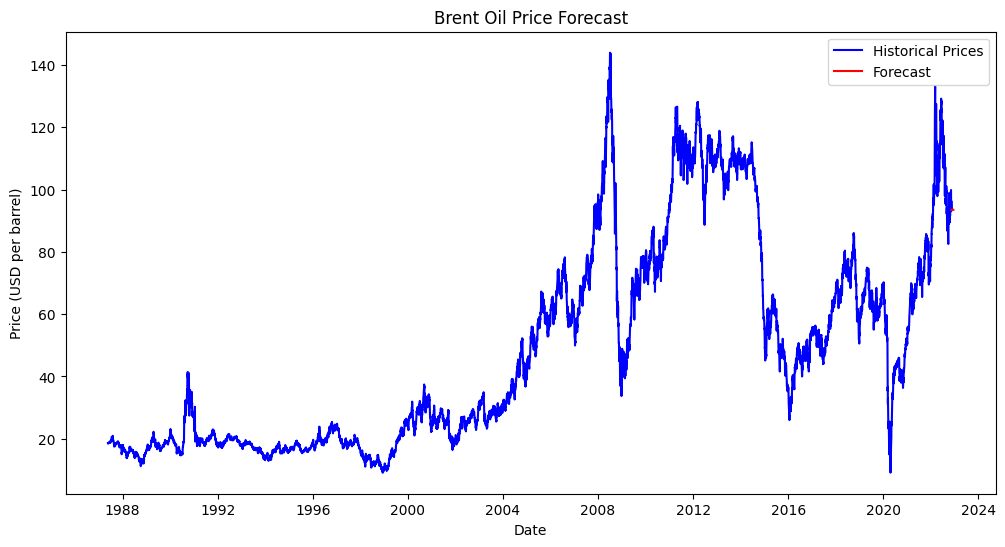

In [19]:
# Forecasting
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days

# Plotting the historical prices and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()


#  Vector Autoregression for multivariate time series analysis.


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index begin

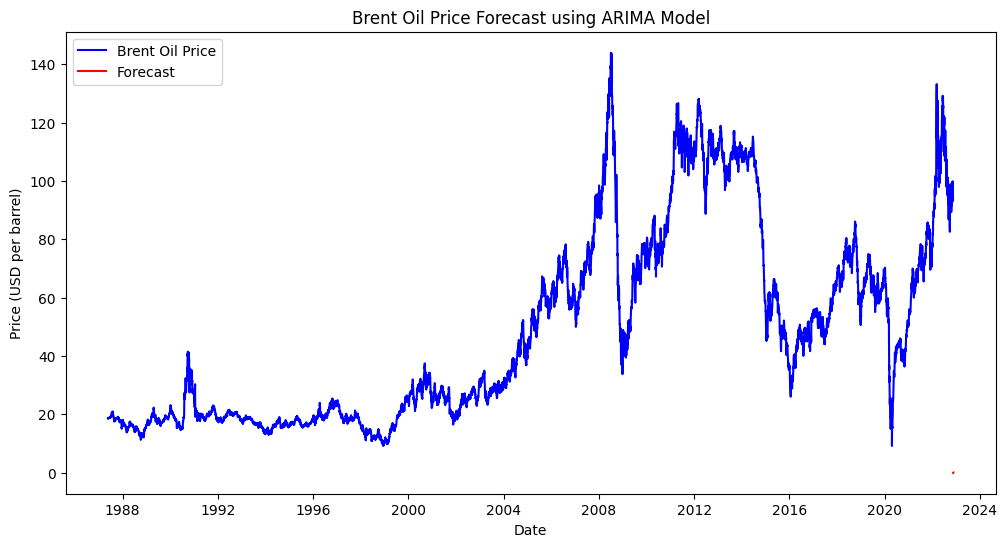

9010   -0.062191
9011    0.006919
9012    0.008677
9013    0.008722
9014    0.008723
Name: predicted_mean, dtype: float64


In [10]:
from oil_price_analysis import analyze_brent_prices_with_arima
forecast, ms_model_fit = analyze_brent_prices_with_arima(data, forecast_steps=5)

# Display the forecasted values
print(forecast)

In [41]:
from oil_price_analysis import analyze_brent_prices_with_ms_arima



# Call the analysis function with Markov-Switching ARIMA
forecast, ms_model_fit = analyze_brent_prices_with_ms_arima(data, forecast_steps=5)

# Display the forecasted values
print(forecast)

ModuleNotFoundError: No module named 'oil_price_analysis'

c:\Users\Naim\Oil-Price-Analysis\scripts\oil_price_analysis.py:100: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date'] = pd.to_datetime(brent_data['Date'])


Epoch 1/50


c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0095
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 3.9259e-04
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 3.4501e-04
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.9651e-04
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.6582e-04
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.3161e-04
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.3602e-04
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.9414e-04
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.7896e-04
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.7134e-04
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.7135e-04
Epoch 12/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.3540e-04
Epoch 13/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.2685e-04
Epoch 14/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.1917e-04
Ep

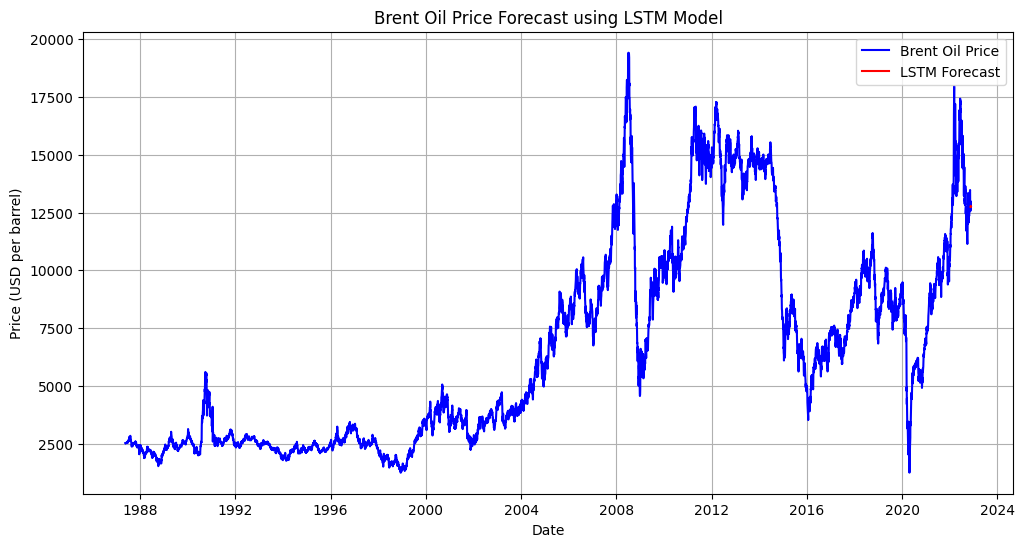

In [14]:
from oil_price_analysis import prepare_data_for_lstm,create_and_train_lstm,forecast_with_lstm,plot_lstm_predictions
# Prepare data for LSTM
X, y, scaler = prepare_data_for_lstm('../data/Copy of BrentOilPrices.csv', time_steps=30)

# Train the LSTM model
model = create_and_train_lstm(X, y, epochs=50, batch_size=32)

# Forecast the next 5 days
predictions = forecast_with_lstm(model, scaler, data, time_steps=30, forecast_steps=5)

# Print the predictions
print(predictions)

plot_lstm_predictions(data, predictions, scaler, time_steps=30)


# GDP

In [ ]:
# Step 1: Import necessary libraries
import wbdata
import pandas as pd
import datetime
import matplotlib.pyplot as plt
start_date = datetime.datetime(1987, 5, 20)
end_date = datetime.datetime(2022, 9, 30)

countries = ['USA', 'EUU', 'CHN']  # 'EUU' is the World Bank code for the European Union
gdp_data = wbdata.get_dataframe({'NY.GDP.MKTP.CD': 'GDP Growth (%)'}, country=countries)
gdp_data.reset_index(inplace=True)
print(gdp_data.dtypes)  # Check the data types of your columns
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data = gdp_data[(gdp_data['date'] >= start_date) & (gdp_data['date'] <= end_date)]
print(gdp_data)
inflation_data = wbdata.get_dataframe({'FP.CPI.TOTL': 'Inflation Rate (%)'}, country=countries)
inflation_data.reset_index(inplace=True)
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data = inflation_data[(inflation_data['date'] >= start_date) & (inflation_data['date'] <= end_date)]

print(inflation_data)
unemployment_data = wbdata.get_dataframe({'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)'}, country=countries)
unemployment_data.reset_index(inplace=True)
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])

unemployment_data = unemployment_data[(unemployment_data['date'] >= start_date) & (unemployment_data['date'] <= end_date)]

print(unemployment_data)
exchange_rate_data = wbdata.get_dataframe({'PA.NUS.FCRF': 'Exchange Rate (Local Currency per USD)'}, country=countries)

exchange_rate_data.reset_index(inplace=True)
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'])
exchange_rate_data = exchange_rate_data[(exchange_rate_data['date'] >= start_date) & (exchange_rate_data['date'] <= end_date)]

print(exchange_rate_data)
renewable_energy_data = wbdata.get_dataframe({'EG.FEC.RNEW.ZS': 'Renewable Energy Consumption (% of total energy)'}, country=countries)
renewable_energy_data.reset_index(inplace=True)
renewable_energy_data['date'] = pd.to_datetime(renewable_energy_data['date'])
renewable_energy_data = renewable_energy_data[(renewable_energy_data['date'] >= start_date) & (renewable_energy_data['date'] <= end_date)]

try:
    env_regulations_data = wbdata.get_dataframe({'CC.ENTX.ENV.ZS': 'Total Environmental Tax Revenue (% of GDP)'}, country=countries)
    env_regulations_data.reset_index(inplace=True)
    env_regulations_data['date'] = pd.to_datetime(env_regulations_data['date'])
    print("Environmental Regulations Data:")
    print(env_regulations_data)
except Exception as e:
    print(f"Error fetching environmental regulations data: {e}")

try:
    trade_data = wbdata.get_dataframe({'BN.GSR.GNFS.CD': 'Net Trade in Goods and Services (BoP, current US$)'}, country=countries)
    trade_data.reset_index(inplace=True)
    trade_data['date'] = pd.to_datetime(trade_data['date'])
    print("Trade Policies Data:")
    print(trade_data)
except Exception as e:
    print(f"Error fetching trade policies data: {e}")
natural_gas_indicator = 'EG.ELC.NGAS.ZS'  # Electricity production from natural gas sources (% of total)

try:
    natural_gas_data = wbdata.get_dataframe({natural_gas_indicator: 'Electricity Production from Natural Gas (%)'}, country=countries)
    
    # Check if the data is returned as expected
    if natural_gas_data is None or natural_gas_data.empty:
        raise ValueError("No data returned for the specified indicator.")

    # Reset index for easier manipulation
    natural_gas_data.reset_index(inplace=True)
    natural_gas_data['date'] = pd.to_datetime(natural_gas_data['date'])
    print("Natural Gas Data:")
    print(natural_gas_data)
except Exception as e:
    print(f"Error fetching natural gas data: {e}")


country            object
date               object
GDP Growth (%)    float64
dtype: object
           country       date  GDP Growth (%)
1            China 2022-01-01    1.788178e+13
2            China 2021-01-01    1.782046e+13
3            China 2020-01-01    1.468774e+13
4            China 2019-01-01    1.427997e+13
5            China 2018-01-01    1.389491e+13
..             ...        ...             ...
159  United States 1992-01-01    6.520327e+12
160  United States 1991-01-01    6.158129e+12
161  United States 1990-01-01    5.963144e+12
162  United States 1989-01-01    5.641580e+12
163  United States 1988-01-01    5.236438e+12

[105 rows x 3 columns]
           country       date  Inflation Rate (%)
1            China 2022-01-01          131.919357
2            China 2021-01-01          129.366217
3            China 2020-01-01          128.109444
4            China 2019-01-01          125.083154
5            China 2018-01-01          121.558878
..             ...        ...   

In [3]:
inflation_data.head()

,country,date,Inflation Rate (%)
1,China,2022-01-01,131.919357
2,China,2021-01-01,129.366217
3,China,2020-01-01,128.109444
4,China,2019-01-01,125.083154
5,China,2018-01-01,121.558878


In [4]:
oil_file_path = r"C:\Users\Naim\Oil-Price-Analysis\data\Copy of BrentOilPrices.csv"
brent_data = pd.read_csv(oil_file_path)
# Convert 'Date' column to datetime and set as index
brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce')
brent_data.set_index('Date', inplace=True)

# Ensure 'date' is datetime type in merged_data
brent_data.reset_index(inplace=True)
brent_data.rename(columns={'Date': 'date'}, inplace=True)

C:\Users\Naim\AppData\Local\Temp\ipykernel_5444\1778233493.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce')


In [5]:
inflation_data.head()

,country,date,Inflation Rate (%)
1,China,2022-01-01,131.919357
2,China,2021-01-01,129.366217
3,China,2020-01-01,128.109444
4,China,2019-01-01,125.083154
5,China,2018-01-01,121.558878


In [6]:
# to datetime
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
brent_data['date'] = pd.to_datetime(brent_data['date'])
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
env_regulations_data['date'] = pd.to_datetime(env_regulations_data['date'])
trade_data['date'] = pd.to_datetime(trade_data['date'])
renewable_energy_data['date'] = pd.to_datetime(renewable_energy_data['date'])
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'])

#extract year
gdp_data['year'] = gdp_data['date'].dt.year
brent_data['year'] = brent_data['date'].dt.year 
inflation_data['year'] = inflation_data['date'].dt.year 
env_regulations_data['year'] = env_regulations_data['date'].dt.year 
trade_data['year'] = trade_data['date'].dt.year 
renewable_energy_data['year'] = renewable_energy_data['date'].dt.year 
unemployment_data['year'] = unemployment_data['date'].dt.year 
exchange_rate_data['year'] = exchange_rate_data['date'].dt.year 




In [7]:
# merge
all_data = brent_data.merge(gdp_data,on='year',how='left')
all_data = all_data.merge(inflation_data[['Inflation Rate (%)','year']],on='year',how='left')
all_data = all_data.merge(env_regulations_data[['Total Environmental Tax Revenue (% of GDP)','year']], on='year', how='left')
all_data = all_data.merge(trade_data[['Net Trade in Goods and Services (BoP, current US$)','year']], on='year',how='left')
all_data = all_data.merge(renewable_energy_data[['Renewable Energy Consumption (% of total energy)','year']], on='year', how='left')
all_data = all_data.merge(exchange_rate_data[['Exchange Rate (Local Currency per USD)','year']],on='year',how='left')
all_data = all_data.merge(unemployment_data[['Unemployment Rate (%)','country','year']], on='year', how='left')

In [8]:
all_data.head()

,date_x,Price,year,country_x,date_y,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP),"Net Trade in Goods and Services (BoP, current US$)",Renewable Energy Consumption (% of total energy),Exchange Rate (Local Currency per USD),Unemployment Rate (%),country_y
0,1987-05-20,18.63,1987,NaN,NaT,NaN,NaN,NaN,2.910000e+08,NaN,NaN,NaN,NaN
1,1987-05-20,18.63,1987,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1987-05-20,18.63,1987,NaN,NaT,NaN,NaN,NaN,-7.042635e+09,NaN,NaN,NaN,NaN
3,1987-05-20,18.63,1987,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1987-05-20,18.63,1987,NaN,NaT,NaN,NaN,NaN,-1.516750e+11,NaN,NaN,NaN,NaN


In [20]:
all_data = all_data.reset_index()
all_data.fillna(all_data.median(), inplace=True)
all_data.info()
print(f'null values \n\n{all_data.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   level_0                                             9011 non-null   int64         
 1   index                                               9011 non-null   int64         
 2   date_x                                              9011 non-null   datetime64[ns]
 3   Price                                               9011 non-null   float64       
 4   year                                                9011 non-null   int32         
 5   date_y                                              9011 non-null   datetime64[ns]
 6   GDP Growth (%)                                      9011 non-null   float64       
 7   Inflation Rate (%)                                  9011 non-null   float64       
 8   Total En

In [21]:
all_data.head()

,level_0,index,date_x,Price,year,date_y,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP),"Net Trade in Goods and Services (BoP, current US$)",Renewable Energy Consumption (% of total energy),Exchange Rate (Local Currency per USD),Unemployment Rate (%)
0,0,0,1987-05-20,18.63,1987,2005-01-01,2.285961e+12,86.509318,1.391,291000000.0,17.4,6.831416,4.47
1,1,20,1987-05-21,18.45,1987,2005-01-01,2.285961e+12,86.509318,1.391,291000000.0,17.4,6.831416,4.47
2,2,40,1987-05-22,18.55,1987,2005-01-01,2.285961e+12,86.509318,1.391,291000000.0,17.4,6.831416,4.47
3,3,60,1987-05-25,18.60,1987,2005-01-01,2.285961e+12,86.509318,1.391,291000000.0,17.4,6.831416,4.47
4,4,80,1987-05-26,18.63,1987,2005-01-01,2.285961e+12,86.509318,1.391,291000000.0,17.4,6.831416,4.47


In [23]:
all_data = all_data[['date_x',                            
'Price',                                                  
'year',                                                   
'GDP Growth (%)',                                         
'Inflation Rate (%)',                                     
'Net Trade in Goods and Services (BoP, current US$)',     
'Renewable Energy Consumption (% of total energy)',
'Unemployment Rate (%)',
'Exchange Rate (Local Currency per USD)']]

In [15]:
all_data = all_data.drop_duplicates(subset='date_x',keep='first')
all_data.describe()

,date_x,Price,year,date_y,GDP Growth (%),Inflation Rate (%),Total Environmental Tax Revenue (% of GDP),"Net Trade in Goods and Services (BoP, current US$)",Renewable Energy Consumption (% of total energy),Exchange Rate (Local Currency per USD),Unemployment Rate (%)
count,9011,9011.000000,9011.000000,8851,8.851000e+03,8851.000000,2.490000e+02,9.011000e+03,8122.000000,8851.000000,8086.000000
mean,2005-02-10 23:46:53.760958720,48.420782,2004.612030,2004-12-06 04:58:42.313862656,5.346004e+12,88.657266,1.391000e+00,1.411257e+11,21.001268,6.944857,4.031880
min,1987-05-20 00:00:00,9.100000,1987.000000,1988-01-01 00:00:00,3.123536e+11,33.187245,1.391000e+00,-1.149700e+10,11.300000,3.722100,2.370000
25%,1996-03-20 12:00:00,19.050000,1996.000000,1996-01-01 00:00:00,8.637493e+11,80.238158,1.391000e+00,1.755100e+10,13.400000,6.227489,3.240000
50%,2005-02-02 00:00:00,38.570000,2005.000000,2005-01-01 00:00:00,2.285961e+12,86.509318,1.391000e+00,8.790515e+10,17.400000,6.831416,4.470000
75%,2014-01-09 12:00:00,70.090000,2014.000000,2014-01-01 00:00:00,1.047562e+13,113.294060,1.391000e+00,2.230239e+11,29.600000,8.277037,4.580000
max,2022-11-14 00:00:00,143.950000,2022.000000,2022-01-01 00:00:00,1.788178e+13,131.919357,1.391000e+00,5.776089e+11,33.900000,8.618743,5.000000
std,NaN,32.860110,10.260414,NaN,5.541860e+12,27.587740,2.224918e-16,1.467828e+11,8.343095,1.292639,0.784118


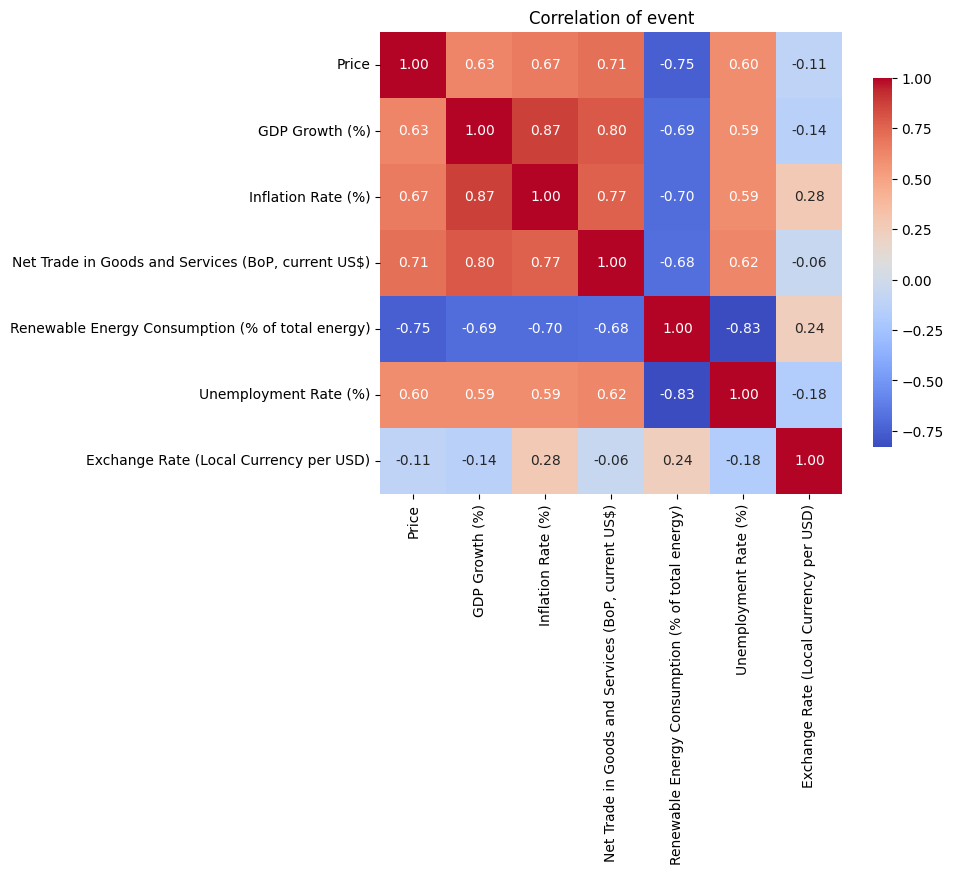

In [25]:
import seaborn as sns
cor_data = all_data.drop(columns=['date_x','year'])
correlation = cor_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot = True, fmt = ".2f", cmap= 'coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation of event')
plt.show()

In [26]:
merged_data = all_data

In [40]:
merged_data.head(0)

,date_x,Price,year,GDP Growth (%),Inflation Rate (%),"Net Trade in Goods and Services (BoP, current US$)",Renewable Energy Consumption (% of total energy),Unemployment Rate (%),Exchange Rate (Local Currency per USD)


Correlation between Brent Oil Prices and GDP Growth: 0.63


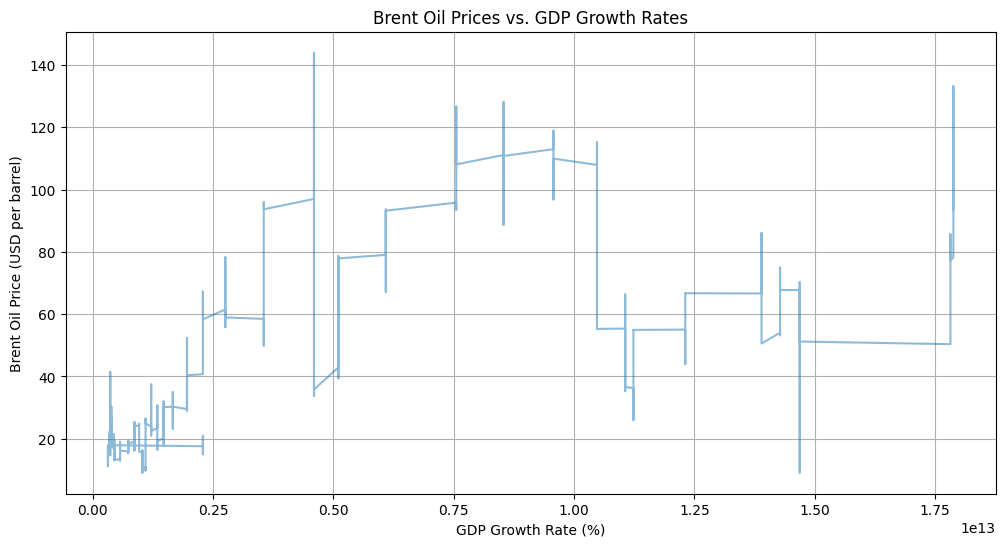

In [28]:


# Step 15: Analyze correlation
correlation = merged_data['Price'].corr(merged_data['GDP Growth (%)'])
print(f"Correlation between Brent Oil Prices and GDP Growth: {correlation:.2f}")

# Step 16: Visualize the relationship
plt.figure(figsize=(12, 6))
plt.plot(merged_data['GDP Growth (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()



Correlation between Brent Oil Prices and Inflation Rate: 0.67


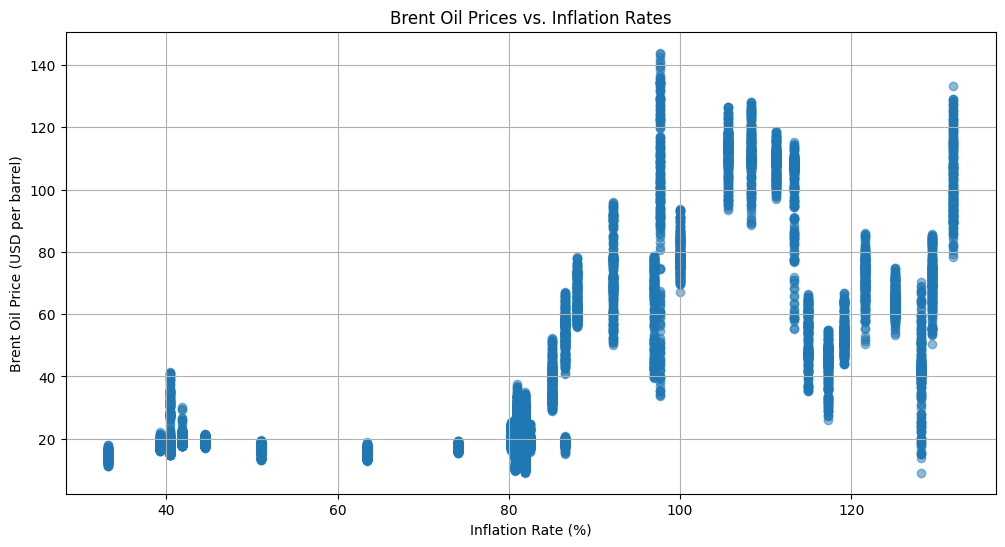

In [30]:

correlation = merged_data['Price'].corr(merged_data['Inflation Rate (%)'])
print(f"Correlation between Brent Oil Prices and Inflation Rate: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Inflation Rate (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()




Correlation between Brent Oil Prices and Unemployment Rate: 0.60


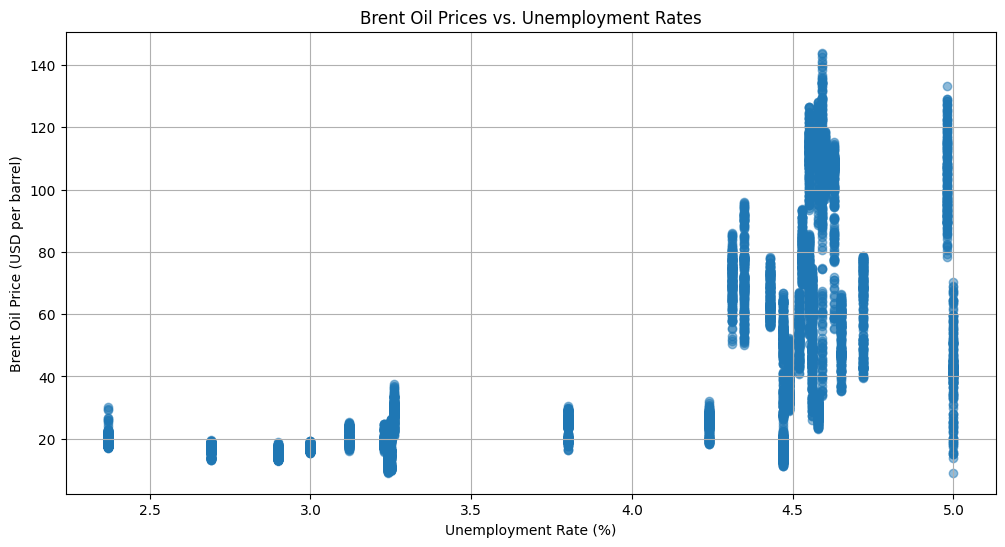

In [32]:

# Calculate the correlation
correlation = merged_data['Price'].corr(merged_data['Unemployment Rate (%)'])
print(f"Correlation between Brent Oil Prices and Unemployment Rate: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Unemployment Rate (%)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()


Correlation between Brent Oil Prices and Exchange Rate: -0.11


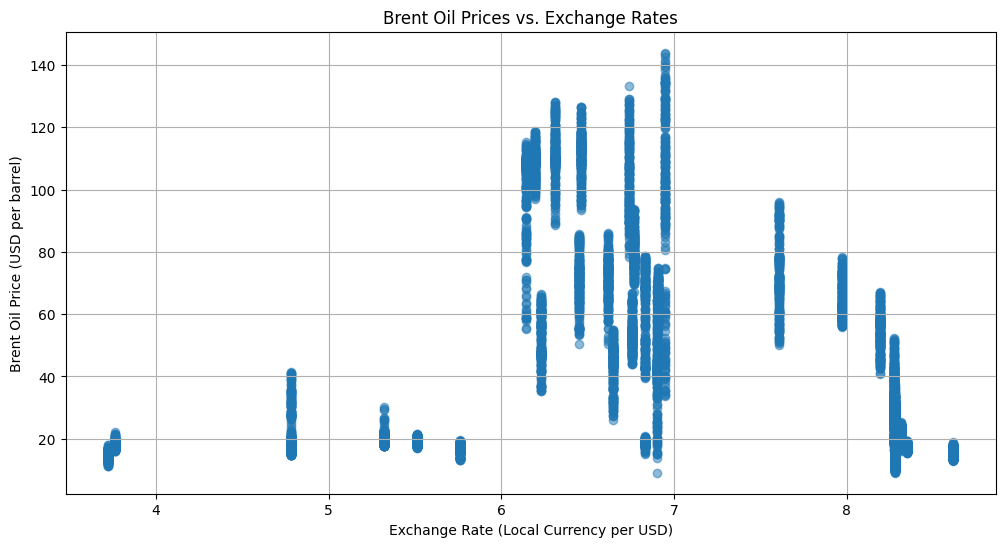

In [34]:

# Calculate the correlation
correlation = merged_data['Price'].corr(merged_data['Exchange Rate (Local Currency per USD)'])
print(f"Correlation between Brent Oil Prices and Exchange Rate: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Exchange Rate (Local Currency per USD)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs. Exchange Rates')
plt.xlabel('Exchange Rate (Local Currency per USD)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()


Correlation between Brent Oil Prices and Renewable Energy Consumption: -0.75


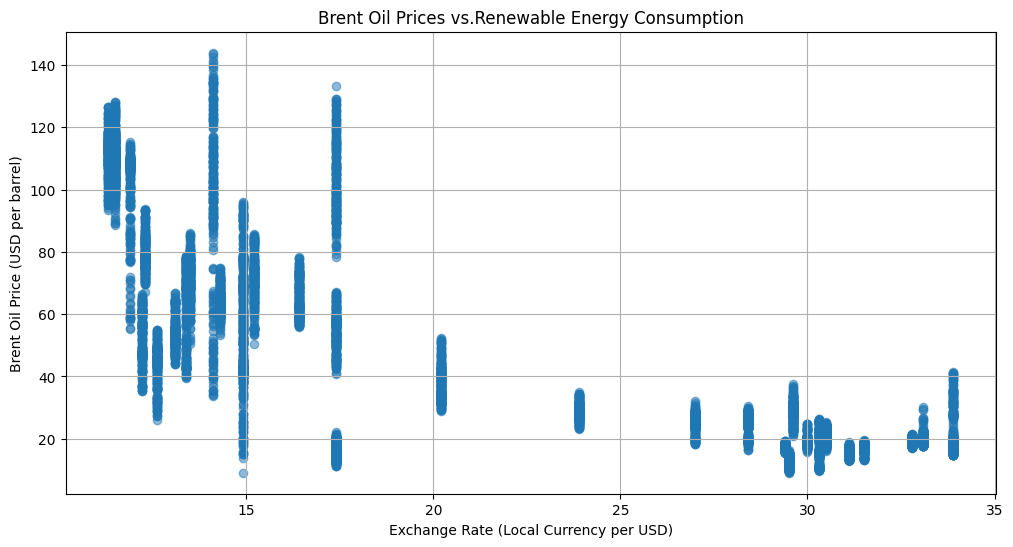

In [35]:

# Calculate the correlation
correlation = merged_data['Price'].corr(merged_data['Renewable Energy Consumption (% of total energy)'])
print(f"Correlation between Brent Oil Prices and Renewable Energy Consumption: {correlation:.2f}")

# Optionally, visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Renewable Energy Consumption (% of total energy)'], merged_data['Price'], alpha=0.5)
plt.title('Brent Oil Prices vs.Renewable Energy Consumption')
plt.xlabel('Exchange Rate (Local Currency per USD)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid()
plt.show()


Correlation between Brent Oil Prices and Trade Policies: 0.71


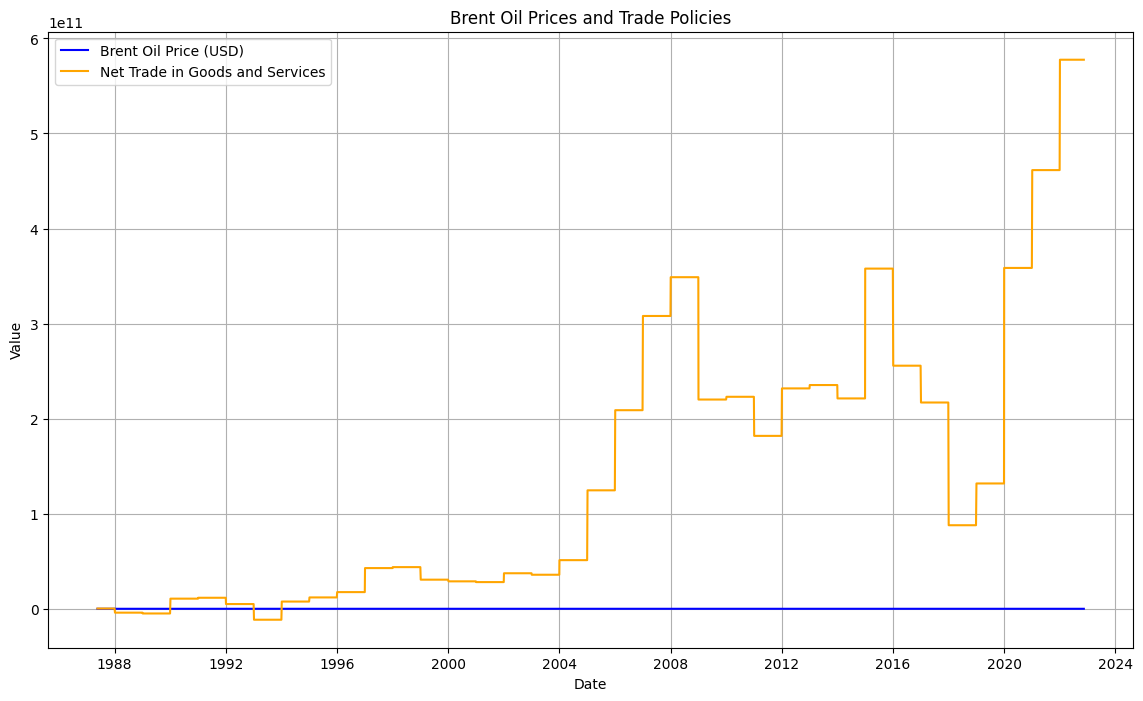

In [38]:


# Calculate correlation between Brent oil prices and trade policies
correlation_trade = merged_data['Price'].corr(merged_data['Net Trade in Goods and Services (BoP, current US$)'])
print(f"Correlation between Brent Oil Prices and Trade Policies: {correlation_trade:.2f}")

# Plotting the trade data
plt.figure(figsize=(14, 8))
plt.plot(merged_data['date_x'], merged_data['Price'], label='Brent Oil Price (USD)', color='blue')
plt.plot(merged_data['date_x'], merged_data['Net Trade in Goods and Services (BoP, current US$)'], label='Net Trade in Goods and Services', color='orange')
plt.title('Brent Oil Prices and Trade Policies')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()




In [39]:
all_data.to_csv('../data/event-data.csv')

Fetching Oil Consumption using indicator: CC.OIL.PSBC.CO
Oil Consumption Data:
    Oil Consumption_Country       date  Oil Consumption
0                     China 2100-01-01              NaN
1                     China 2050-01-01              NaN
2                     China 2049-01-01              NaN
3                     China 2048-01-01              NaN
4                     China 2047-01-01              NaN
..                      ...        ...              ...
363           United States 1964-01-01              NaN
364           United States 1963-01-01              NaN
365           United States 1962-01-01              NaN
366           United States 1961-01-01              NaN
367           United States 1960-01-01              NaN

[368 rows x 3 columns]
Fetching Natural Gas Consumption using indicator: EG.ELC.NGAS.ZS
Natural Gas Consumption Data:
    Natural Gas Consumption_Country       date  Natural Gas Consumption
0                             China 2023-01-01            

C:\Users\Naim\AppData\Local\Temp\ipykernel_8084\2175840343.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce')


Merging Oil Consumption data...
After merging Oil Consumption:
date                       datetime64[ns]
Price                             float64
Oil Consumption_Country            object
Oil Consumption                   float64
dtype: object
Merging Natural Gas Consumption data...
After merging Natural Gas Consumption:
date                               datetime64[ns]
Price                                     float64
Oil Consumption_Country                    object
Oil Consumption                           float64
Natural Gas Consumption_Country            object
Natural Gas Consumption                   float64
dtype: object
Merging Coal Consumption data...
After merging Coal Consumption:
date                               datetime64[ns]
Price                                     float64
Oil Consumption_Country                    object
Oil Consumption                           float64
Natural Gas Consumption_Country            object
Natural Gas Consumption                   float

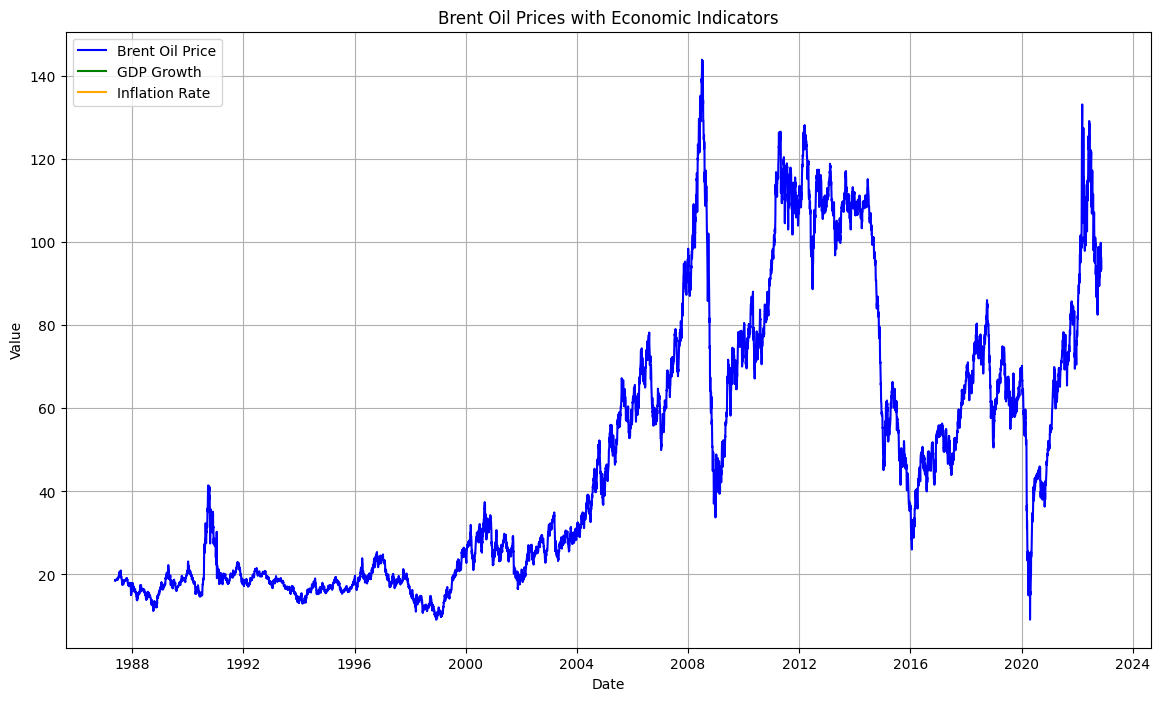

In [329]:
import wbdata
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Set the date range for your analysis
start_date = datetime.datetime(1987, 5, 20)
end_date = datetime.datetime(2022, 9, 30)

# Specify the countries you want to analyze
countries = ['USA', 'EUU', 'CHN', 'IND', 'JPN']

# Define indicators for different energy sources
indicators = {
    'Oil Consumption': 'CC.OIL.PSBC.CO',  # Oil consumption (% of total energy use)
    'Natural Gas Consumption': 'EG.ELC.NGAS.ZS',  # Electricity production from natural gas sources (% of total)
    'Coal Consumption': 'CC.COAL.EMIS.CH',  # Coal consumption (% of total energy use)
    'Renewable Energy Consumption': 'EG.FEC.RNEW.ZS'  # Renewable energy consumption (% of total energy use)
}

# Fetch energy data
energy_data = {}
for energy_source, indicator in indicators.items():
    try:
        print(f"Fetching {energy_source} using indicator: {indicator}")
        data = wbdata.get_dataframe({indicator: f'{energy_source}'}, country=countries)
        
        if data is None or data.empty:
            raise ValueError(f"No data returned for the {energy_source} indicator.")
        
        # Reset index for easier manipulation
        data.reset_index(inplace=True)
        data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Ensure 'date' is datetime type
        energy_data[energy_source] = data.rename(columns={'country': f'{energy_source}_Country'})
        print(f"{energy_source} Data:")
        print(energy_data[energy_source])

    except Exception as e:
        print(f"Error fetching {energy_source} data: {e}")
        energy_data[energy_source] = None

# Load Brent oil prices data
oil_file_path = r"C:\Users\Naim\Oil-Price-Analysis\data\Copy of BrentOilPrices.csv"
brent_data = pd.read_csv(oil_file_path)

# Convert 'Date' column to datetime and set as index
brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce')
brent_data.set_index('Date', inplace=True)

# Ensure 'date' is datetime type in merged_data
brent_data.reset_index(inplace=True)
brent_data.rename(columns={'Date': 'date'}, inplace=True)

# Ensure merged_data starts with brent_data
merged_data = brent_data.copy()

# Merge energy data with Brent oil prices
for energy_source, data in energy_data.items():
    if data is not None:
        print(f"Merging {energy_source} data...")
        # Merge data for each energy source
        merged_data = merged_data.merge(data, left_on='date', right_on='date', how='left', suffixes=('', f'_{energy_source}')).fillna(0)
        print(f"After merging {energy_source}:")
        print(merged_data.dtypes)  # Print data types to check for compatibility

# Display the merged dataset
print("Merged Data:")
print(merged_data)

# Identify and remove outliers using IQR for each energy source
for energy_source in indicators.keys():
    if f'{energy_source}' in merged_data.columns:
        column_name = f'{energy_source}'
        Q1 = merged_data[column_name].quantile(0.25)
        Q3 = merged_data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        merged_data = merged_data[(merged_data[column_name] >= (Q1 - 1.5 * IQR)) & (merged_data[column_name] <= (Q3 + 1.5 * IQR))]

# Define economic indicators
economic_indicators = {
    'GDP Growth': 'NY.GDP.MKTP.CD',  # GDP growth (current US$)
    'Inflation Rate': 'FP.CPI.TOTL',  # Inflation, consumer prices (annual %)
}

# Fetch economic data
economic_data = {}
for indicator_name, indicator_code in economic_indicators.items():
    try:
        print(f"Fetching {indicator_name} using indicator: {indicator_code}")
        data = wbdata.get_dataframe({indicator_code: indicator_name}, country=countries)
        
        if data is None or data.empty:
            raise ValueError(f"No data returned for the {indicator_name} indicator.")
        
        data.reset_index(inplace=True)
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        economic_data[indicator_name] = data.rename(columns={'country': f'{indicator_name}_Country'})
        print(f"{indicator_name} Data:")
        print(economic_data[indicator_name])

    except Exception as e:
        print(f"Error fetching {indicator_name} data: {e}")
        economic_data[indicator_name] = None

# Merge economic data with your energy data
for indicator_name, data in economic_data.items():
    if data is not None:
        print(f"Merging economic data for {indicator_name}...")
        merged_data = merged_data.merge(data, on='date', how='left', suffixes=('', f'_{indicator_name}'))

# Display the updated merged dataset
print("Updated Merged Data with Economic Indicators:")
print(merged_data)

# Perform correlation analysis with the new variables
if 'Price' in merged_data.columns and 'GDP Growth' in merged_data.columns:
    correlation_gdp_energy = merged_data['Price'].corr(merged_data['GDP Growth'])
    print(f"Correlation between Brent Oil Price and GDP Growth: {correlation_gdp_energy:.2f}")

if 'Price' in merged_data.columns and 'Inflation Rate' in merged_data.columns:
    correlation_inflation_energy = merged_data['Price'].corr(merged_data['Inflation Rate'])
    print(f"Correlation between Brent Oil Price and Inflation Rate: {correlation_inflation_energy:.2f}")

# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(merged_data['date'], merged_data['Price'], label='Brent Oil Price', color='blue')
if 'GDP Growth' in merged_data.columns:
    plt.plot(merged_data['date'], merged_data['GDP Growth'], label='GDP Growth', color='green')
if 'Inflation Rate' in merged_data.columns:
    plt.plot(merged_data['date'], merged_data['Inflation Rate'], label='Inflation Rate', color='orange')

plt.title('Brent Oil Prices with Economic Indicators')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [4]:
# Importing functions from the script
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from oil_price_analysis import backtest_arima, out_of_sample_testing, time_series_cross_validation

import pandas as pd

# Correcting the typo in the function name and specifying the correct path
data = pd.read_csv("../data/Copy of BrentOilPrices.csv")  # Use the correct function name
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the DataFrame
print(data.head())

prices = data['Price']  # assuming the dataset has a 'Price' column


c:\Users\Naim\Oil-Price-Analysis\scripts\oil_price_analysis.py:190: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('oil_prices.csv', parse_dates=['Date'], index_col='Date')
C:\Users\Naim\AppData\Local\Temp\ipykernel_16980\4012234173.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
# Define the ARIMA model
arima_model = ARIMA(prices, order=(1, 1, 1))  # You may adjust (p,d,q) based on AIC/BIC
arima_fit = arima_model.fit()

# Forecast and evaluate
arima_forecast = arima_fit.forecast(steps=len(prices))
arima_rmse = mean_squared_error(prices, arima_forecast, squared=False)
arima_mae = mean_absolute_error(prices, arima_forecast)
arima_r2 = r2_score(prices, arima_forecast)

print("ARIMA - RMSE:", arima_rmse, "MAE:", arima_mae, "R-squared:", arima_r2)


ARIMA - RMSE: 55.800444663463516 MAE: 49.77401442159481 R-squared: -1.8839351722844935


c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()
# VAR requires multiple columns, so we include additional indicators
train_size = int(0.8 * len(data))
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit VAR model
var_model = VAR(train)
var_fit = var_model.fit(2)  # Adjust lag order as needed
var_forecast = var_fit.forecast(y=train.values, steps=len(test))

# Calculate RMSE, MAE, and R-squared for VAR model
var_rmse = mean_squared_error(test['Price'], [f[0] for f in var_forecast], squared=False)
var_mae = mean_absolute_error(test['Price'], [f[0] for f in var_forecast])
var_r2 = r2_score(test['Price'], [f[0] for f in var_forecast])

print("VAR - RMSE:", var_rmse, "MAE:", var_mae, "R-squared:", var_r2)


VAR - RMSE: 1.6118943922612247e+18 MAE: 1.608911266352793e+18 R-squared: -6.102475986473983e+33


c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
# Prepare features and target
X = data.drop(columns=['Price'])  # Using other indicators as features
y = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_forecast = xgb_model.predict(X_test)

# Calculate RMSE, MAE, and R-squared for XGBoost model
xgb_rmse = mean_squared_error(y_test, xgb_forecast, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_forecast)
xgb_r2 = r2_score(y_test, xgb_forecast)

print("XGBoost - RMSE:", xgb_rmse, "MAE:", xgb_mae, "R-squared:", xgb_r2)


XGBoost - RMSE: 24.82377009527912 MAE: 18.47603761356669 R-squared: -0.44733275584613064


c:\Users\Naim\Oil-Price-Analysis\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
# Store metrics in a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['ARIMA', 'VAR', 'XGBoost'],
    'RMSE': [arima_rmse, var_rmse, xgb_rmse],
    'MAE': [arima_mae, var_mae, xgb_mae],
    'R-squared': [arima_r2, var_r2, xgb_r2]
})

print(metrics_df)


     Model          RMSE           MAE     R-squared
0    ARIMA  5.580044e+01  4.977401e+01 -1.883935e+00
1      VAR  1.611894e+18  1.608911e+18 -6.102476e+33
2  XGBoost  2.482377e+01  1.847604e+01 -4.473328e-01


Backtest Metrics: {'MAE': np.float64(18.484341205477442), 'RMSE': np.float64(24.833934902765257), 'MAPE': np.float64(27.849586910771855)}


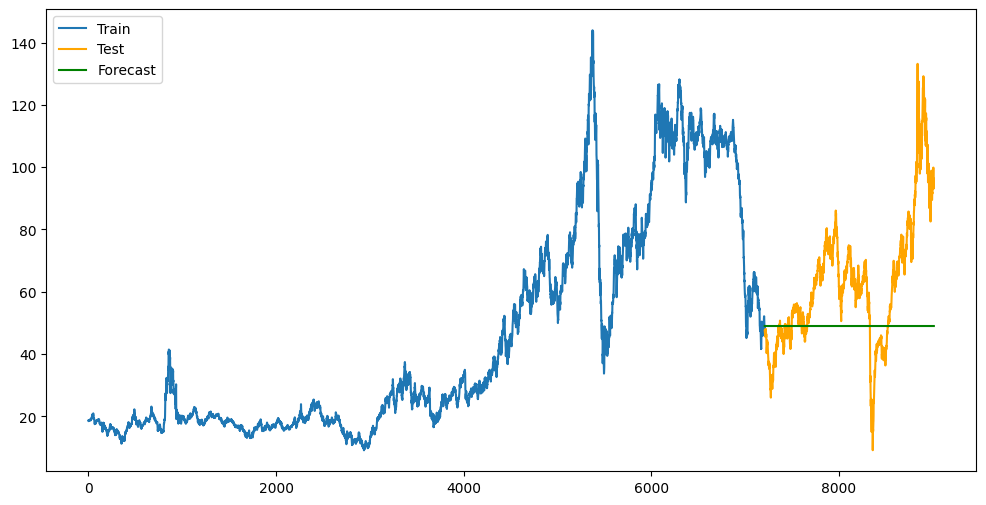

Backtest Metrics: {'MAE': np.float64(18.484341205477442), 'RMSE': np.float64(24.833934902765257), 'MAPE': np.float64(27.849586910771855)}


In [5]:
# Run backtesting on the data
backtest_metrics = backtest_arima(prices, order=(1, 1, 1), train_size=0.8)
print("Backtest Metrics:", backtest_metrics)


Out-of-Sample Metrics: {'MAE': np.float64(3.675020567333647), 'RMSE': np.float64(4.3750031847913196), 'MAPE': np.float64(3.8347098382356974)}


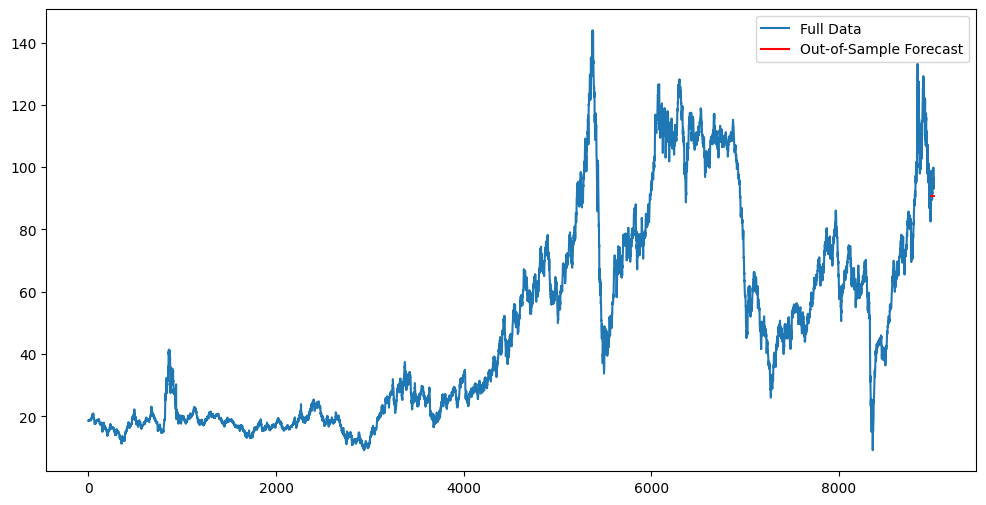

Out-of-Sample Metrics: {'MAE': np.float64(3.675020567333647), 'RMSE': np.float64(4.3750031847913196), 'MAPE': np.float64(3.8347098382356974)}


In [6]:
# Run out-of-sample testing
out_of_sample_metrics = out_of_sample_testing(prices, order=(1, 1, 1), out_of_sample_period=30)
print("Out-of-Sample Metrics:", out_of_sample_metrics)


In [7]:
# Run time series cross-validation
cv_metrics = time_series_cross_validation(prices, order=(1, 1, 1), n_splits=5)
print("Cross-Validation Metrics:", cv_metrics)


Cross-Validation Fold Metrics: {'MAE': np.float64(2.920755079290695), 'RMSE': np.float64(3.709501472075627), 'MAPE': np.float64(20.3197113072667)}
Cross-Validation Fold Metrics: {'MAE': np.float64(14.49216223325511), 'RMSE': np.float64(16.08944307089413), 'MAPE': np.float64(48.469497422623306)}
Cross-Validation Fold Metrics: {'MAE': np.float64(29.1127889585778), 'RMSE': np.float64(35.03007336346018), 'MAPE': np.float64(36.3821205414502)}
Cross-Validation Fold Metrics: {'MAE': np.float64(25.809370766728232), 'RMSE': np.float64(30.868995349172145), 'MAPE': np.float64(44.76566808557305)}
Cross-Validation Fold Metrics: {'MAE': np.float64(17.596383932520528), 'RMSE': np.float64(23.632590327120894), 'MAPE': np.float64(26.565919820951933)}
Average Cross-Validation Metrics: {'MAE': np.float64(17.986292194074473), 'RMSE': np.float64(21.866120716544597), 'MAPE': np.float64(35.30058343557304)}
Cross-Validation Metrics: {'MAE': np.float64(17.986292194074473), 'RMSE': np.float64(21.866120716544597)